In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset into the notebook

In [2]:
import os 
os.getcwd()

'C:\\Users\\HP'

In [4]:
data = pd.read_csv('car data.csv')

Display few rows in dataset

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Display bottom Five rows in the dataset

In [5]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


To check number of rows and column in the dataset 

In [8]:
data.shape

(301, 9)

Get the information about dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
data.info(memory_usage=False) #is it used to disable the display of memory usege information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)

Display the name of column labels in dataset

In [12]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Statistical descriptive analysis

In [13]:
# 1. summary of statistics of numerical columns in dataset
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
# 2. if in dataset is their any missing value then it show 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
# 3. in dataset one value is repeated many times so it is required to count unique value
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [17]:
#4. calculate correlation between two column in dataset that means how two column related with each other
numdata = data.select_dtypes(include = ['float64','int64'])
corr_matrix = numdata.corr()
numdata.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [23]:
#5. to calculate mean of selling price for each fuel type
mean = data.groupby('Fuel_Type')['Selling_Price'].mean()
print(mean)


Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.264184
Name: Selling_Price, dtype: float64


In [26]:
# 6. Distribution of transmission type 
trans = data['Transmission'].value_counts()
print(trans)

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [27]:
#7. maximum driven kilometers for each owner category 
maximum_drive = data.groupby('Owner')['Driven_kms'].max()
print(maximum_drive)

Owner
0    500000
1     58000
3    142000
Name: Driven_kms, dtype: int64


In [31]:
# 8. Percentage of cars with different selling types
per= data['Selling_type'].value_counts(normalize =True)*100
print(per)

Selling_type
Dealer        64.784053
Individual    35.215947
Name: proportion, dtype: float64


In [32]:
# 9. calculate median of present price for cars of differnt year
median=data.groupby('Year')['Present_Price'].median()
print(median)

Year
2003     5.130
2004    12.350
2005    11.835
2006     5.875
2007     0.665
2008     0.750
2009    10.500
2010     7.500
2011     4.600
2012     5.980
2013     5.700
2014     6.835
2015     7.200
2016     5.800
2017     5.430
2018     9.830
Name: Present_Price, dtype: float64


In [33]:
#10. calculate average of selling price for cars with different transmission
avg = data.groupby('Transmission')['Selling_Price'].mean()
print(avg)


Transmission
Automatic    9.420000
Manual       3.931992
Name: Selling_Price, dtype: float64


In [34]:
#11. calculate how many cars distribute over each year
dist = data['Year'].value_counts().sort_index()
print(dist)

Year
2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: count, dtype: int64


Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of selling prices')

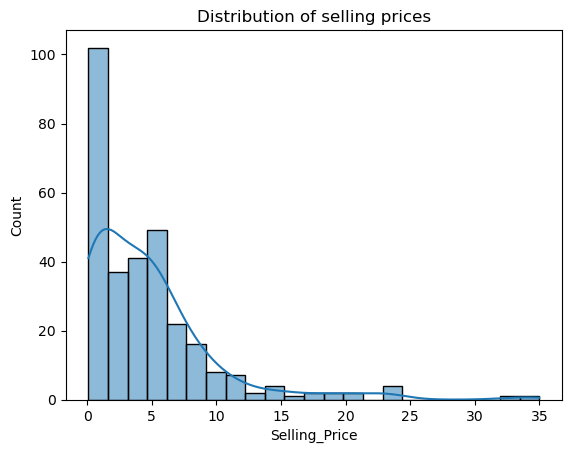

In [7]:
#1.What is the distribution of selling prices ?
selling_price = data['Selling_Price']
sns.histplot(selling_price,kde=True);
plt.title('Distribution of selling prices')

In [9]:
# 2. how many unique fuel types are present?
unique_fule = data['Fuel_Type'].unique()
print(unique_fule)

['Petrol' 'Diesel' 'CNG']


Text(0.5, 1.0, 'Spread of prsent prices')

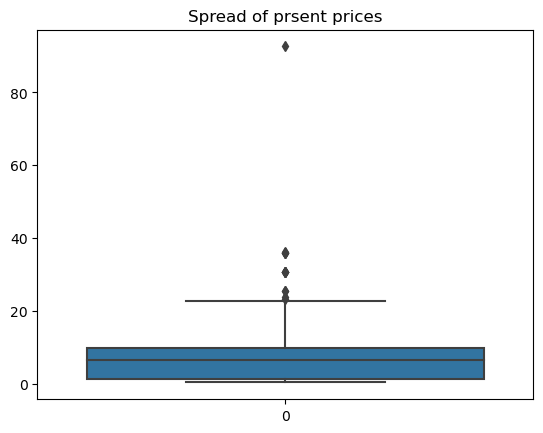

In [10]:
#3. What is the spread of present prices for the cars?
present_price = data['Present_Price']
sns.boxplot(present_price)
plt.title('Spread of prsent prices')

Text(0.5, 1.0, 'Distribution of driven km')

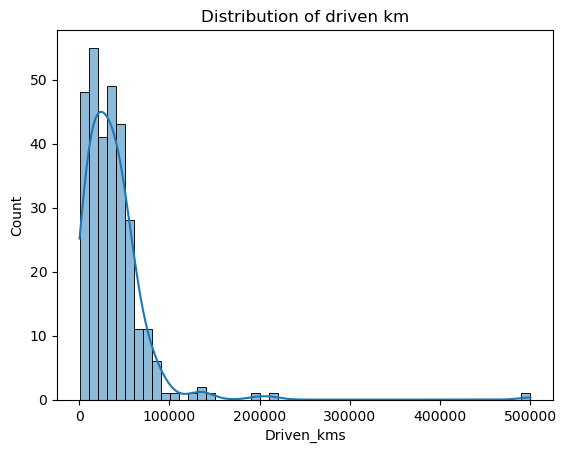

In [11]:
#4. How are the kilometers driven distributed across the dataset?
driven_kms=data['Driven_kms']
sns.histplot(driven_kms,kde=True);
plt.title('Distribution of driven km')

In [12]:
#5.what are the proportion of cars with different selling types?
selling_type_pr= data['Selling_type'].value_counts(normalize=True)
print(selling_type_pr)

Selling_type
Dealer        0.647841
Individual    0.352159
Name: proportion, dtype: float64


In [14]:
#6.unique car names present in dataset
unique = data['Car_Name'].nunique()
print(unique)

98


BIVARIATE ANALYSIS


Text(0.5, 1.0, 'Selling Price vs. Present Price')

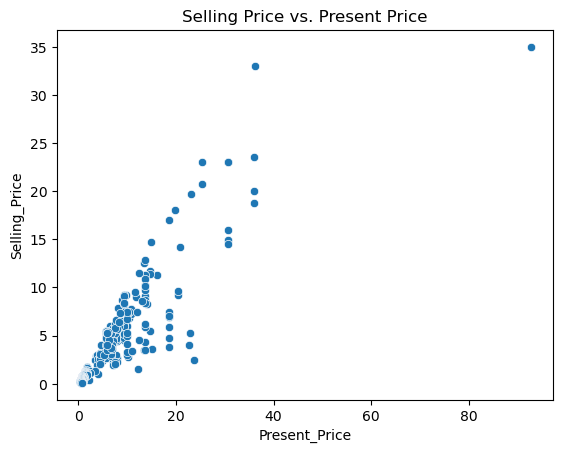

In [19]:
# 1. how the selling price vary with present price?
selling_vs_present_price = sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Selling Price vs. Present Price')

In [21]:
#2. Is there a correlation between the selling price and the driven kilometers?
correlation_selling_driven_kms = data[['Selling_Price', 'Driven_kms']].corr()
print(correlation_selling_driven_kms)

               Selling_Price  Driven_kms
Selling_Price       1.000000    0.029187
Driven_kms          0.029187    1.000000


Text(0.5, 1.0, 'Selling Price vs. Owner')

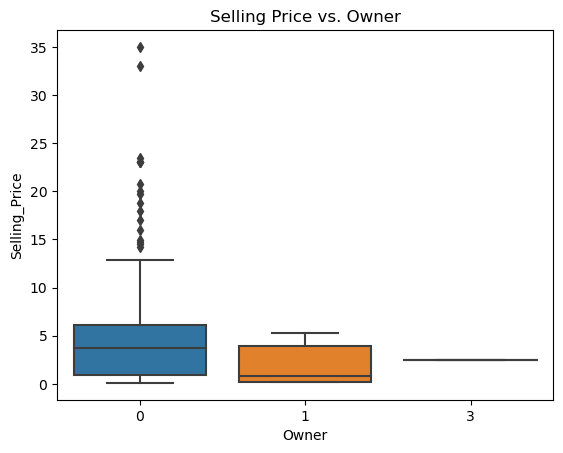

In [22]:
#3. What is the relationship between the selling price and the owner count?
selling_vs_owner = sns.boxplot(x='Owner', y='Selling_Price', data=data)
plt.title('Selling Price vs. Owner')

Text(0.5, 1.0, 'Selling Price by Fuel Type')

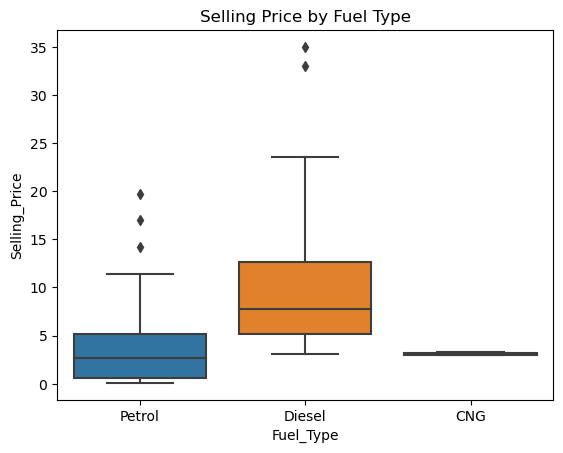

In [23]:
#4. How does the selling price differ between different fuel types?
selling_price_by_fuel = sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price by Fuel Type')

Text(0.5, 1.0, 'Selling Price by Transmission Type')

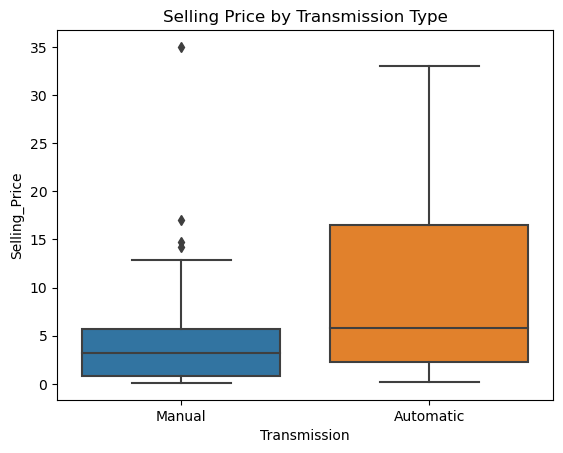

In [25]:
#5. Is there a difference in selling prices based on transmission types?
selling_price_by_transmission = sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price by Transmission Type')

Checking the distribution of categorical data

In [26]:
print(data['Fuel_Type'].value_counts())
print(data['Selling_type'].value_counts())
print(data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Categorical Data Encoding using Custom Mapping

In [27]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [29]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


DATA PREPARATION FOR PREDICTIVE MODELING

In [30]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [32]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [34]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64
